<h3>Modelo de aprendizaje no supervisado: Hierarchical-Clustering</h3>

<h3>Estudiantes:</h3>
<h4>- Cristian Mateo Samboni Muñoz</h4>
<h4>- Linda Katerin Rodriguez Moya</h4>
<h4>- Deninson Alexander Chamorro Rueda</h4>

<h3>diseñar los modelos de Clustering
(agrupación): K-means e hierarchical clustering. Para cada
algoritmo realizar los siguientes pasos:</h3>
<h4>1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</h4>

<P>R/ al realizar un analisis exploratorio obtenemos la siguiente información:


In [1]:
# Importar bibliotecas necesarias
import pandas as pd

# Cargar archivo y explorar la estructura inicial del dataset
date = pd.read_csv('./Mall_Customers.csv')

# Visualizar las primeras filas y la información general del dataset
date_head = date.head()
date_info = date.info()

date_head, date_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 None)

Realizamos el análisis exploratorio inicial de las variables numéricas para identificar distribuciones, valores atípicos y posibles tendencias<p>

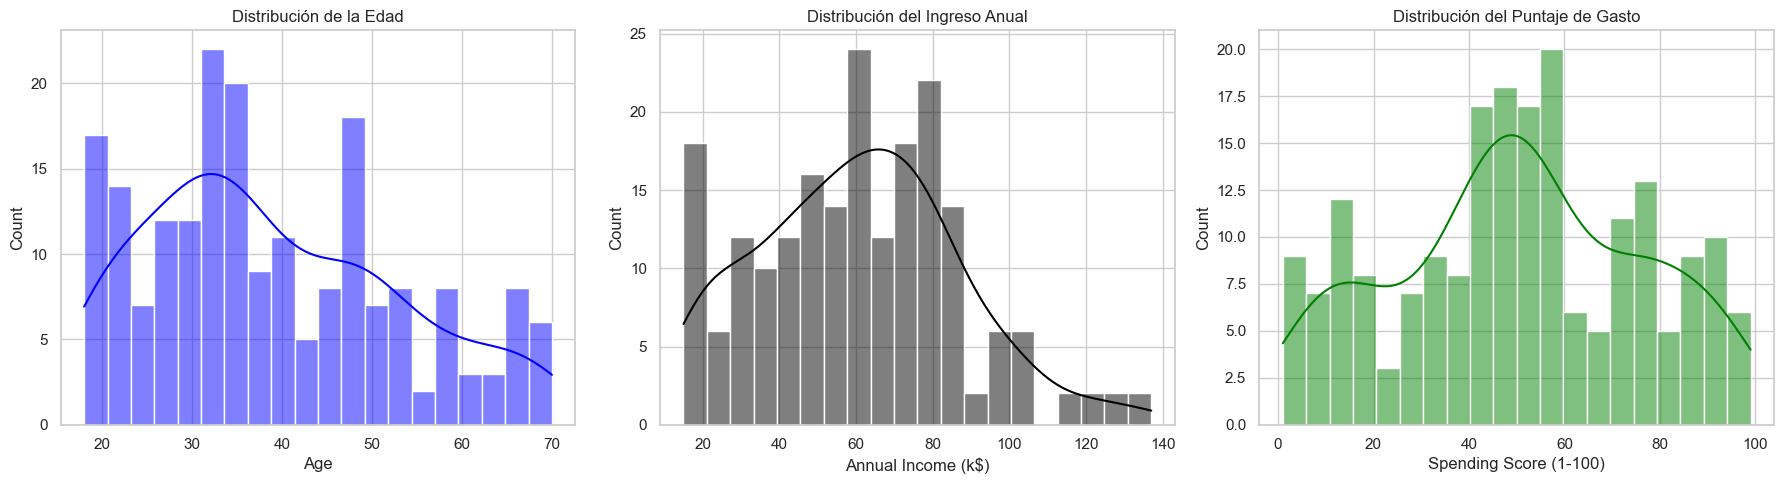

In [2]:
#Importamos bibliotecas necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del estilo de gráficos
sns.set(style="whitegrid")

# Crear gráficos para las variables numéricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Distribución de la Edad
sns.histplot(date['Age'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Distribución de la Edad')

# Distribución del Ingreso Anual
sns.histplot(date['Annual Income (k$)'], bins=20, kde=True, color='black', ax=axes[1])
axes[1].set_title('Distribución del Ingreso Anual')

# Distribución del Puntaje de Gasto
sns.histplot(date['Spending Score (1-100)'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribución del Puntaje de Gasto')

plt.tight_layout()
plt.show()


<h4>Observaciones de las Distribuciones</h4><br>
<b>AGE:</b> se observa la mayoria esta entre 20 y 40 años ademas tiene una ligera asimetria hacia la derecha <br>
<b>ANNUAL INCOME:</b> Los ingresos anuales estan distribuidos casi uniformes que oscilan entre los 15 mil y 140 mil dolares <br>
<b>SPENDING SCORE:</b> Los puntajes son uniformemente distribuidos, no se observa tendencia de subir o bajar los valores.

<h4>2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</h4>


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Paso 1: Identificar valores faltantes
missing_values = date.isnull().sum()

# Paso 2: Eliminar columnas irrelevantes
date_cleaned = date.drop(columns=["CustomerID"])

# Paso 3: Codificar la variable categórica "Gender"
encoder = LabelEncoder()
date_cleaned["Gender"] = encoder.fit_transform(date_cleaned["Gender"])  # hacemos los cambios numericos de Male: 0, Female: 1

# Paso 4: Escalar las características numéricas (Age, Annual Income, Spending Score)
scaler = StandardScaler()
numeric_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
date_cleaned[numeric_columns] = scaler.fit_transform(date_cleaned[numeric_columns])

# Verificar los datos procesados, mostrando la informacion final
date_cleaned.head(), missing_values


(   Gender       Age  Annual Income (k$)  Spending Score (1-100)
 0       1 -1.424569           -1.738999               -0.434801
 1       1 -1.281035           -1.738999                1.195704
 2       0 -1.352802           -1.700830               -1.715913
 3       0 -1.137502           -1.700830                1.040418
 4       0 -0.563369           -1.662660               -0.395980,
 CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64)

<h4>3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</h4>


Varianzas:
 Gender                      0.247638
Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64


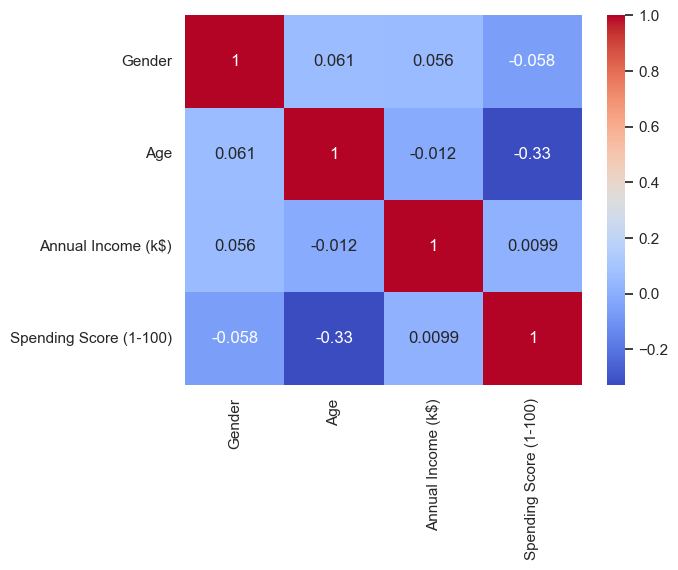

Varianza explicada por cada componente principal: [0.45125272 0.44098465]
Obetenmos buenos resultados, 44% y 45% mas o menos y al sumar estos dos componentes principales retienen un aproximado de 89% de la informacion total


In [9]:

#Calculamos varianza con el fin de Identificar características con baja varianza que no contribuyen significativamente al modelo.
variances = date_cleaned.var()
print("Varianzas:\n", variances)

#Calcular la matriz de correlación y eliminar características altamente correlacionadas.
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = date_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

#Aplicar modelos supervisados adaptados al problema para calcular la relevancia de cada variable
from sklearn.decomposition import PCA

# Se seleccióna variables numéricas
numeric_date = date_cleaned[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Aplicar PCA (Principal Component Analysis), PCA reduce la cantidad de variables manteniendo la mayor parte de la información original
pca = PCA(n_components=2)  # Reducimos a 2 dimensiones
pca_transformed = pca.fit_transform(numeric_date)

print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)
print("Obetenmos buenos resultados, 44% y 45% mas o menos y al sumar estos dos componentes principales retienen un aproximado de 89% de la informacion total")




<h4>4. Entrenar el modelo configurando los diferentes hiperparámetros.</h4>
Entrenaremos el modelo utilizando las dos características principales obtenidas con PCA (Principal Component Analysis) en el punto anterior, configuracion de los hiperparametros son: con un numero de cluster de 4, como metrica de distancia (Euclediana), y finalmente el método de enlace ward (Ward's linkage) que es una técnica utilizada en hierarchical clustering que minimiza la varianza intracluster al fusionar grupos.

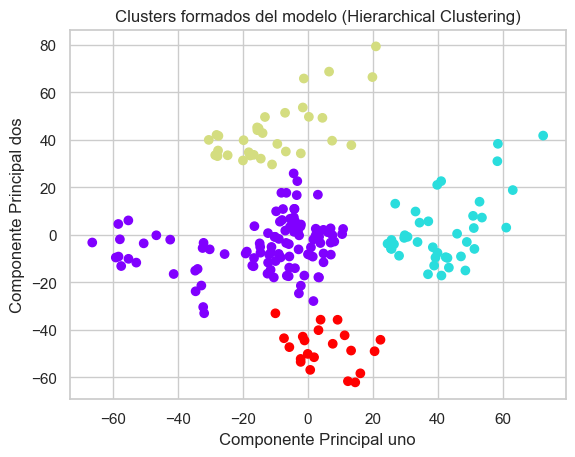

In [22]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Entrenar el modelo con hierarchical clustering
modelo = AgglomerativeClustering(
    n_clusters=4,          # Número de clusters
    affinity='euclidean',  # Métrica de distancia
    linkage='ward'         # Método de enlace
)

# Ajustar el modelo con los datos transformados por PCA
modelo.fit(pca_transformed)

# Obtener las etiquetas de los clusters
etiqueta = modelo.labels_

# Visualizar los resultados
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=etiqueta, cmap='rainbow')
plt.title("Clusters formados del modelo (Hierarchical Clustering)")
plt.xlabel("Componente Principal uno")
plt.ylabel("Componente Principal dos")
plt.show()


<h4>5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.</h4>
Evaluaremos el desempeños teniendo en cuenta la siguiente informacion:<br>
- Coeficiente de Silhouette(Rango: -1 a 1)<br>
1: Los puntos están perfectamente asignados a su cluster.<br>
0: Los puntos están en el límite entre clusters.<br>
-1: Los puntos se asignaron al cluster incorrecto.<br>
- Índice de Calinski-Harabasz (Cuanto mayor sea el valor, mejor es la formación de los clusters.)<br>
- Índice Davies-Bouldin(Cuanto más bajo, mejor es el modelo)

In [24]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Etiquetas de los clusters
labels = modelo.labels_

# Coeficiente de Silhouette
silhouette_avg = silhouette_score(pca_transformed, labels)
print("Coeficiente de Silhouette:", silhouette_avg)

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(pca_transformed, labels)
print("Índice de Calinski-Harabasz:", ch_score)

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(pca_transformed, labels)
print("Índice de Davies-Bouldin:", db_score)


Coeficiente de Silhouette: 0.4946393344587158
Índice de Calinski-Harabasz: 171.2601274602618
Índice de Davies-Bouldin: 0.6643721422747951


- Coeficiente de Silhouette(Rango: -1 a 1): El valor se acerca a 1 por lo tanto los puntos estan perfectamente asignados a su cluster
- Índice de Calinski-Harabasz: tiene un valor elevado por lo tanto es mejor la formacion de cluster
- Índice Davies-Bouldin(Cuanto más bajo, mejor es el modelo): 

<h4>6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo</h4>


<h3>Clusters en 2D:</h3>
se realiza una gráfica donde los puntos están agrupados y coloreados al cluster asignado.

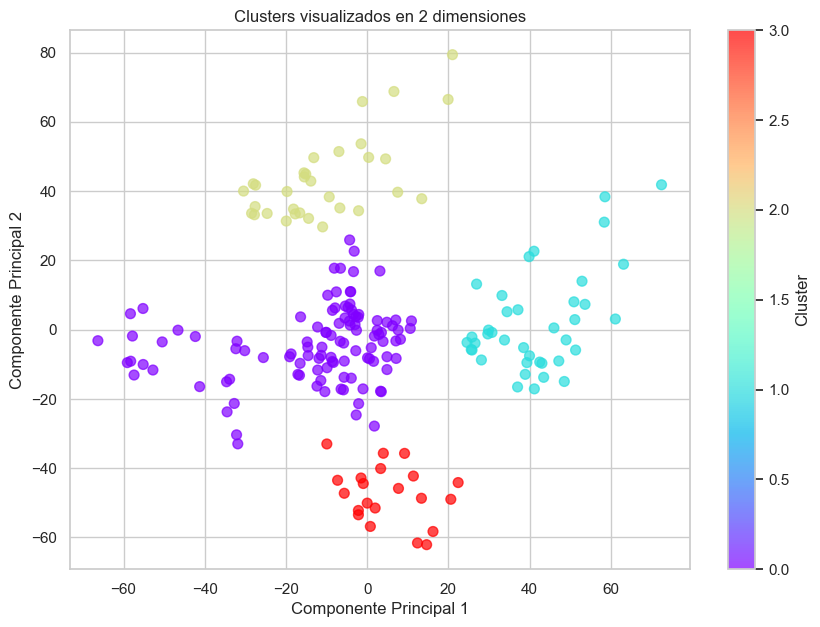

In [26]:
import matplotlib.pyplot as plt

# Gráfica de dispersión de los clusters en dos dimensiones
plt.figure(figsize=(10, 7))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=labels, cmap="rainbow", s=50, alpha=0.7)
plt.title("Clusters visualizados en 2 dimensiones")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


<h3>Dendrograma</h3>

El dendrograma muestra cómo se agrupan los puntos jerárquicamente y es útil para elegir el número de clusters.
A continuacion generamos un árbol que muestra cómo se forman los clusters.

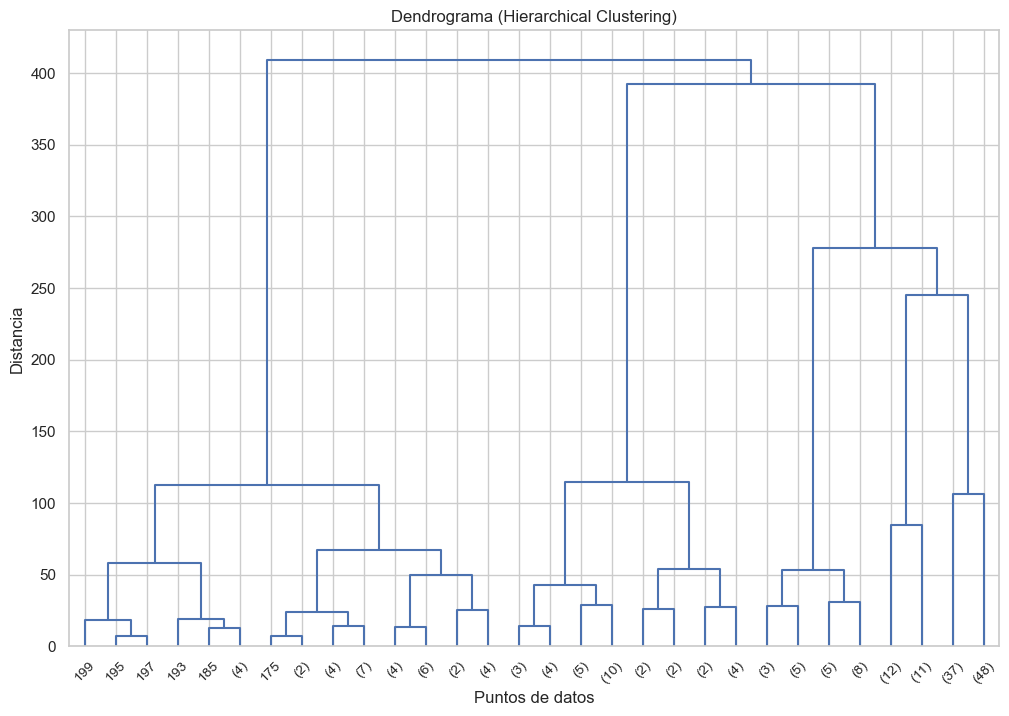

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Crear la matriz de enlace
linkage_matrix = linkage(pca_transformed, method="ward")

# Graficar dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode="level", p=4, color_threshold=0)
plt.title("Dendrograma (Hierarchical Clustering)")
plt.xlabel("Puntos de datos")
plt.ylabel("Distancia")
plt.show()


<h3>Coeficiente de Silhouette por Cluster</h3>

Esta gráfica muestra el coeficiente de Silhouette para cada punto, indicando qué tan bien se encuentra cada punto dentro de su cluster.

Se espera una visualización para evaluar la cohesión y separación de los clusters.

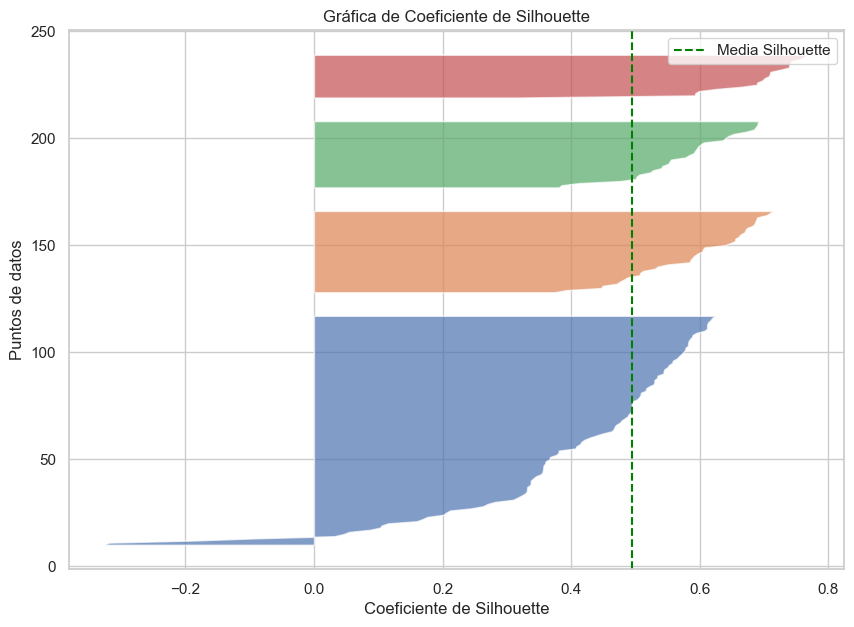

In [36]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Calcular el coeficiente de Silhouette para cada punto
silhouette_values = silhouette_samples(pca_transformed, labels)

# Crear la gráfica de Silhouette
plt.figure(figsize=(10, 7))
y_lower = 10
for i in range(4):  # Ajusta el rango según el número de clusters, en este caso 4 como se viene trabajando
    cluster_silhouette = silhouette_values[labels == i] #
    cluster_silhouette.sort()
    y_upper = y_lower + cluster_silhouette.shape[0]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette, alpha=0.7)
    y_lower = y_upper + 10  # Espacio entre clusters

plt.title("Gráfica de Coeficiente de Silhouette")
plt.xlabel("Coeficiente de Silhouette")
plt.ylabel("Puntos de datos")
plt.axvline(x=silhouette_avg, color="green", linestyle="--", label="Media Silhouette")
plt.legend()
plt.show()


<h4>7. Interpretar, analizar y documentar los resultados obtenidos.</h4>

Finalmente obtenidos los clusters y las graficas de visualizacion, se puede analizar los resultados con el fin de comprender mejor los datos y evaluar la capacidad del modelo resaltando que cada punto anterior tiene su explicación al final de cada proceso, se resalta lo siguiente en la actividad:.
<H4>Analisis de los cluster formados</H4><br>
- visuzalizacion en 2D:<br> se muestra como se agrupan los puntos en funcion de las componentes principales, en este caso se observan cluster compactos y bien separados, indicando que el modelo agrupo correctamente los puntos segun su similitud<br>
- Dendograma: <br>
Facilita a identificar visualmente cuantos clusters podrian ser ideales, en este caso las uniones en la parte superior estan separadas por lo tanto no es necesario aumentar el numero de cluster<br>
<H4>Evaluación del desempeño del modelo</H4><br>
- Coeficiente de Silhouette:<br>
Obtenemos un valor promedio moderado de cohesión (0.4946393344587158), cercano a 1 esto indica clusters bien definidos.<br>
- Índice de Calinski-Harabasz:<br>
En este caso obtenemos un valor alto (171.2601274602618) indicando una mejor separación entre clusters y mayor compactividad dentro de los mismos.<br>
- Índice de Davies-Bouldin: <br>
Se obtiene un valor bajo (0.6643721422747951) indicando cluster bien separados con menor dispersion en el interior.






